In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import datetime as dt
from matplotlib.ticker import FuncFormatter

In [85]:
df = pd.read_csv('/Users/labbot/Documents/metis_bootcamp/project01/Csv_cleaned5.csv')
df["DATETIME"] = pd.to_datetime(df["DATE"])
df["DAY_OF_WEEK"] = df["DATETIME"].dt.day_name()
df.head()

,Unnamed: 0,STATION,DATE,DAILY_ENTRIES,day_of_week,DATETIME,DAY_OF_WEEK
0,0,1 AV,08/17/2019,6208.0,Saturday,2019-08-17,Saturday
1,1,1 AV,08/18/2019,4367.0,Sunday,2019-08-18,Sunday
2,2,1 AV,08/19/2019,14726.0,Monday,2019-08-19,Monday
3,3,1 AV,08/20/2019,15737.0,Tuesday,2019-08-20,Tuesday
4,4,1 AV,08/21/2019,15953.0,Wednesday,2019-08-21,Wednesday


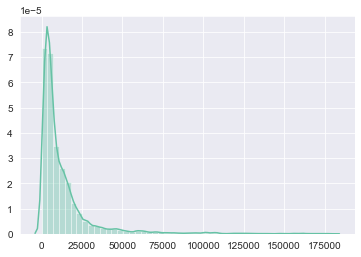

In [86]:
sns.distplot([df['DAILY_ENTRIES']])

In [87]:
#create a new dataframe of the 15 stations with highest volume over the entire period, and another for top 5
df_top15_total_entries=df.groupby("STATION")["DAILY_ENTRIES"].sum().sort_values(ascending=False).reset_index().head(15)
df_top5_total_entries=df.groupby("STATION")["DAILY_ENTRIES"].sum().sort_values(ascending=False).reset_index().head(5)


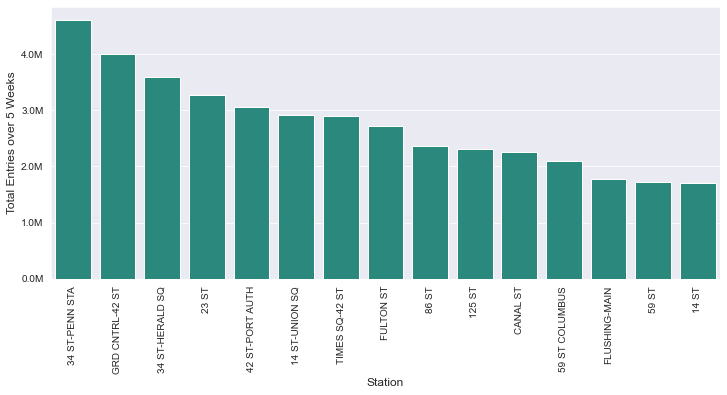

In [88]:
# set chart style
sns.set_palette("Set2")
sns.set_style("darkgrid")

# bar chart of total traffic across the 15 top stations
plt.figure(figsize=(12,5))

ax = sns.barplot(color="#1a9988ff",x=df_top15_total_entries["STATION"],y=df_top15_total_entries["DAILY_ENTRIES"])
plt.xticks(rotation=90,fontsize=10)
plt.ylabel(ylabel="Total Entries over 5 Weeks",fontsize=12)
plt.xlabel(xlabel="Station",fontsize=12)
plt.ticklabel_format(axis='y', style='plain')
plt.yticks(fontsize=10)

# format millions in the y axis
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter);


In [192]:
# create list of target station names (defined later by high traffic=True and near event location=True)
target_station_names = ['TIMES SQ-42 ST','42 ST-PORT AUTH','34 ST-PENN STA','GRD CNTRL-42 ST','34 ST-HERALD SQ','23 ST','14 ST-UNION SQ']
    
# create a dataframe filtered to just the target stations
df_target_stations = df[df['STATION'].isin(target_station_names)]

In [203]:
# find the names of the top 15 highest-traffic stations
top_stations_names = df_top5_total_entries['STATION'].unique()

# create a new dataframe containing only highest-traffic stations
df_top_stations = df[df['STATION'].isin(top_stations_names)]

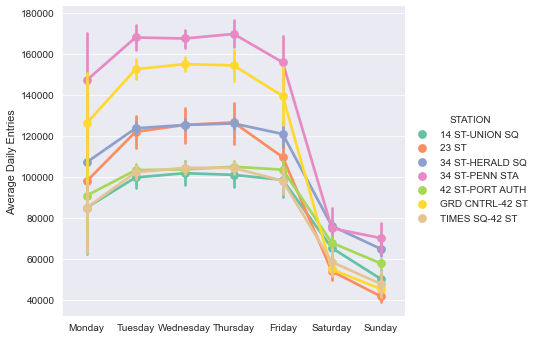

In [193]:
# create line chart showing avg entries per weekday for target stations
ordered_weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.catplot(x='DAY_OF_WEEK',y='DAILY_ENTRIES',order=ordered_weekdays,
            hue='STATION',kind='point',data=df_target_stations,palette=sns.color_palette("Set2"), height=5, aspect=1.2)

plt.ylabel(ylabel="Average Daily Entries",fontsize=11)
plt.xlabel(xlabel="");


In [179]:
# import gps dataset from https://data.ny.gov/widgets/i9wp-a4ja
df_gps = pd.read_csv('/Users/labbot/Documents/metis_bootcamp/project01/NYC_Transit_Subway_Entrance_And_Exit_Data.csv')
df_gps = df_gps.sort_values('Station Longitude', ascending=False)

In [191]:
# create new station name column 'GPS_STATION_NAME' to more easily to match the GPS file
# remove everything after "-" (inclusive) in the station name
df_top15_total_entries['GPS_STATION_NAME'] = df_top15_total_entries['STATION'].apply(lambda x: x.split('-')[0])

# do a bunch of string manipulation to try to get turnstile and gps station names to match each other (did not achieve 100% match)
df_gps['Station Name'] = df_gps['Station Name'].str.upper()
df_gps['Station Name'] = df_gps['Station Name'].str.replace("GRAND CENTRAL","GRD CNTRL")
df_gps['Station Name'] = df_gps['Station Name'].str.replace("TIMES SQUARE","TIMES SQ")
df_gps['Station Name'] = df_gps['Station Name'].str.replace("TH","")
df_gps['Station Name'] = df_gps['Station Name'].str.replace("RD","")
df_gps['Station Name'] = df_gps['Station Name'].str.replace("ND ","")
df_gps['Station Name'] = df_gps['Station Name'].str.replace(" AV","")


In [204]:
# merge the turnstile entry data with the gps data
df_top15_total_entries_gps = df_top15_total_entries.merge(df_gps,left_on='GPS_STATION_NAME',right_on='Station Name',how='left').groupby(['STATION']).first().reset_index()

# confirm it worked -- looks like there are three stations that did not get matched
# I'm going to ignore 59 ST COLUMBUS non-match, since we have another 59 ST station in the df already
df_top15_total_entries_gps.head(15)



,STATION,DAILY_ENTRIES,GPS_STATION_NAME,Division,Line,Station Name,Station Latitude,Station Longitude,Route1,Route2,...,ADA,ADA Notes,Free Crossover,North South Street,East West Street,Corner,Entrance Latitude,Entrance Longitude,Station Location,Entrance Location
0,125 ST,2311614.0,125 ST,IRT,Lexington,125 ST,40.804138,-73.937594,4,5,...,True,NaN,True,Lexington Ave,125th St,SE,40.804164,-73.937444,"(40.804138, -73.937594)","(40.804164, -73.937444)"
1,14 ST,1700264.0,14 ST,IND,6 Avenue,14 ST,40.738228,-73.996209,F,L,...,False,NaN,True,6th Ave,14th St,NE,40.737286,-73.996437,"(40.738228, -73.996209)","(40.737286, -73.996437)"
2,14 ST-UNION SQ,2908558.0,14 ST,IND,6 Avenue,14 ST,40.738228,-73.996209,F,L,...,False,NaN,True,6th Ave,14th St,NE,40.737286,-73.996437,"(40.738228, -73.996209)","(40.737286, -73.996437)"
3,23 ST,3274683.0,23 ST,IRT,Lexington,23 ST,40.739864,-73.986599,6,R,...,False,In Planning,False,Park Ave,23rd St,NW,40.740419,-73.986452,"(40.739864, -73.986599)","(40.740419, -73.986452)"
4,34 ST-HERALD SQ,3597977.0,34 ST,IND,6 Avenue,34 ST,40.749719,-73.987823,B,D,...,True,NaN,True,6th Ave,33rd St,SW,40.748950,-73.988623,"(40.749719, -73.987823)","(40.74895, -73.988623)"
5,34 ST-PENN STA,4609118.0,34 ST,IND,6 Avenue,34 ST,40.749719,-73.987823,B,D,...,True,NaN,True,6th Ave,33rd St,SW,40.748950,-73.988623,"(40.749719, -73.987823)","(40.74895, -73.988623)"
6,42 ST-PORT AUTH,3055070.0,42 ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,59 ST,1725691.0,59 ST,IRT,Lexington,59 ST,40.762526,-73.967967,N,Q,...,False,NaN,True,Lexington Ave,59th St,NW,40.762414,-73.968371,"(40.762526, -73.967967)","(40.762414, -73.968371)"
8,59 ST COLUMBUS,2091404.0,59 ST COLUMBUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,86 ST,2365226.0,86 ST,IRT,Lexington,86 ST,40.779492,-73.955589,4,5,...,False,NaN,False,Lexington Ave,86th St,SW,40.779468,-73.955905,"(40.779492, -73.955589)","(40.779468, -73.955905)"


In [183]:
# drop unmatched stations from dataset so we can iterate and add to map
df_top15_total_entries_gps_nonan = df_top15_total_entries_gps[df_top15_total_entries_gps['Entrance Latitude'].notna()]

In [184]:
import folium

In [205]:
# create folium map
m = folium.Map(location=[40.730610, -73.935242])
folium.TileLayer('cartodbpositron').add_to(m)

# add markers to our map for top stations
for index,row in df_top15_total_entries_gps_nonan.iterrows():

    folium.Marker(
        location=[row['Entrance Latitude'],row['Entrance Longitude']],
        popup=row['STATION'],
        icon=folium.Icon(icon='train',prefix='fa',color='orange')
    ).add_to(m)

# manually add our stations that didn't map to gps data 
folium.Marker(
        location=[40.753087,-73.979537],
        popup='GRAND CENTRAL',
        icon=folium.Icon(icon='train',prefix='fa',color='orange')
    ).add_to(m)

folium.Marker(
        location=[40.754222,-73.984569],
        popup='PORT AUTHORITY',
        icon=folium.Icon(icon='train',prefix='fa',color='orange')
    ).add_to(m)

folium.Marker(
        location=[40.710368,-74.009509],
        popup='FULTON ST',
        icon=folium.Icon(icon='train',prefix='fa',color='orange')
    ).add_to(m)


m.save('index.html')
m

In [206]:
# add event space marker and save as separate file
folium.Marker(
        location=[40.751819,-73.987314],
        popup='GOTHAM HALL',
        icon=folium.Icon(icon='star',prefix='fa',color='green')
    ).add_to(m)
m.save('index2.html')
m